In [1]:
# Importamos librerías
import pandas as pd

In [2]:
df = pd.read_csv('Acci.csv') # Llamé así al csv creado en el ETL

In [3]:
# Veremos que hay nulos porque se reemplazó '?' por NaN/null/NaT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                5008 non-null   int64  
 1   fecha                     5008 non-null   object 
 2   HORA declarada            3504 non-null   object 
 3   Ruta                      5003 non-null   object 
 4   OperadOR                  4998 non-null   object 
 5   flight_no                 1326 non-null   object 
 6   route                     4245 non-null   object 
 7   ac_type                   4995 non-null   object 
 8   registration              4736 non-null   object 
 9   cn_ln                     4341 non-null   object 
 10  all_aboard                4991 non-null   float64
 11  PASAJEROS A BORDO         4787 non-null   float64
 12  crew_aboard               4789 non-null   float64
 13  cantidad de fallecidos    5000 non-null   float64
 14  passenge

In [4]:
# Descripción de dataframe
df.describe()

,Unnamed: 0,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,Año,Valor Decada,Military,Comercial,Sobrevivientes,Sobrevivientes_Pasajeros
count,5008.000000,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,4964.000000,5008.000000,5008.000000,4998.000000,4998.000000,4991.000000,4773.000000
mean,2503.500000,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1.718372,1970.851637,7.525559,0.152461,0.847539,8.801643,3.574691
std,1445.829404,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,55.495544,24.703696,2.489953,0.359503,0.359503,30.639214,3.186525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1251.750000,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1951.000000,6.000000,0.000000,1.000000,0.000000,2.000000
50%,2503.500000,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,0.000000,1970.000000,7.000000,0.000000,1.000000,0.000000,3.000000
75%,3755.250000,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,1992.000000,10.000000,0.000000,1.000000,3.000000,5.000000
max,5007.000000,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2750.000000,2021.000000,13.000000,1.000000,1.000000,516.000000,43.000000


- _Tamaño del Conjunto de Datos: El conjunto de datos consta de 5008 observaciones. Sin embargo, algunas columnas tienen valores faltantes, como "PASAJEROS A BORDO" y "crew aboard," lo que indica que no todas las observaciones tienen información completa en esas columnas._
- _Variables Dummy (Military y Comercial): Las variables dummy "Military" y "Comercial" indican si un accidente está asociado con vuelos militares o comerciales. Los valores promedio muestran que la mayoría de los accidentes en el conjunto de datos están relacionados con vuelos comerciales en lugar de vuelos militares._
- _En promedio, hay alrededor de 31 personas a bordo de una aeronave, con un valor medio de 4.52 tripulantes a bordo. La cantidad promedio de fallecidos es de aproximadamente 22.29, con 18.94 fallecidos entre los pasajeros y 3.59 entre la tripulación._

In [8]:
# Importamos librerías
import matplotlib.pyplot as plt

Correlación entre all_aboard y cantidad de fallecidos: 0.7396458630568632


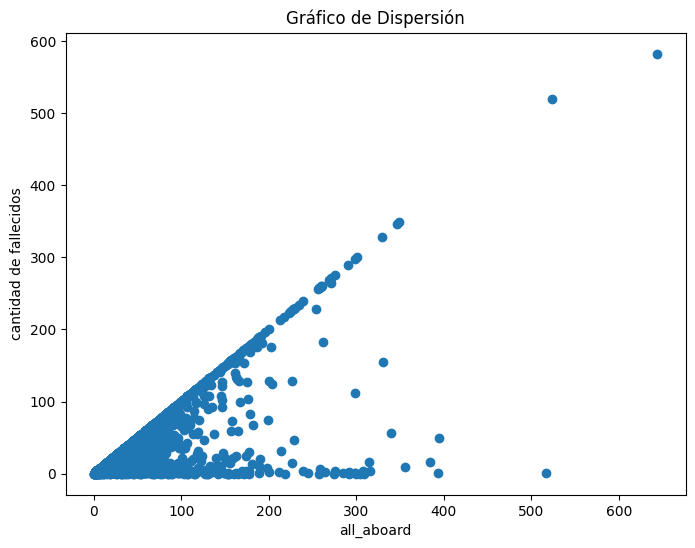

In [19]:
# Seleccionamos las columnas numéricas
columna_x = "all_aboard"
columna_y = "cantidad de fallecidos"

# Creamos un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df[columna_x], df[columna_y])
plt.xlabel(columna_x)
plt.ylabel(columna_y)
plt.title("Gráfico de Dispersión")

# Calculamos la correlación
correlacion = df[columna_x].corr(df[columna_y])
print(f"Correlación entre {columna_x} y {columna_y}: {correlacion}")

# gráfico
plt.show()

_Nota: La correlación entre las columnas "all aboard" (número total de personas a bordo) y "cantidad de fallecidos" es positiva y tiene un valor de 0.7396. Esto sugiere que existe una relación positiva entre el número de personas a bordo de una aeronave y la cantidad de personas fallecidas en un accidente. La correlación no implica causalidad. No podemos concluir que el aumento en el número de personas a bordo sea la causa directa del aumento en la cantidad de fallecidos Otros factores pueden influir en esta relación._

In [22]:
# Seleccionamos las columnas que incluiremos en el cálculo de correlación
columnas_seleccionadas = ['crew_fatalities', 'ground', 'Sobrevivientes', 'cantidad de fallecidos', 'Año', 'Military', 'Comercial', 'Hora Accidente']

# Creamos un nuevo DataFrame con las columnas seleccionadas
df_seleccionado = df[columnas_seleccionadas]

# la columna 'Hora Accidente' en minutos desde la medianoche
df_seleccionado['Hora Accidente'] = pd.to_datetime(df['Hora Accidente'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['Hora Accidente'], format='%H:%M:%S').dt.minute

# Calculamos la matriz de correlación
matriz_correlacion = df_seleccionado.corr()

# la matriz de correlación
matriz_correlacion

C:\Users\gmg\AppData\Local\Temp\ipykernel_27060\3441224618.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Hora Accidente'] = pd.to_datetime(df['Hora Accidente'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(df['Hora Accidente'], format='%H:%M:%S').dt.minute


,crew_fatalities,ground,Sobrevivientes,cantidad de fallecidos,Año,Military,Comercial,Hora Accidente
crew_fatalities,1.000000,0.043879,-0.182731,0.572466,0.062565,0.274762,-0.274762,-0.010611
ground,0.043879,1.000000,-0.006878,0.032402,0.028071,-0.002955,0.002955,-0.016202
Sobrevivientes,-0.182731,-0.006878,1.000000,-0.045238,0.129370,-0.087777,0.087777,0.027564
cantidad de fallecidos,0.572466,0.032402,-0.045238,1.000000,0.161875,0.048769,-0.048769,0.004743
Año,0.062565,0.028071,0.129370,0.161875,1.000000,0.013503,-0.013503,0.015685
Military,0.274762,-0.002955,-0.087777,0.048769,0.013503,1.000000,-1.000000,-0.015154
Comercial,-0.274762,0.002955,0.087777,-0.048769,-0.013503,-1.000000,1.000000,0.015154
Hora Accidente,-0.010611,-0.016202,0.027564,0.004743,0.015685,-0.015154,0.015154,1.000000


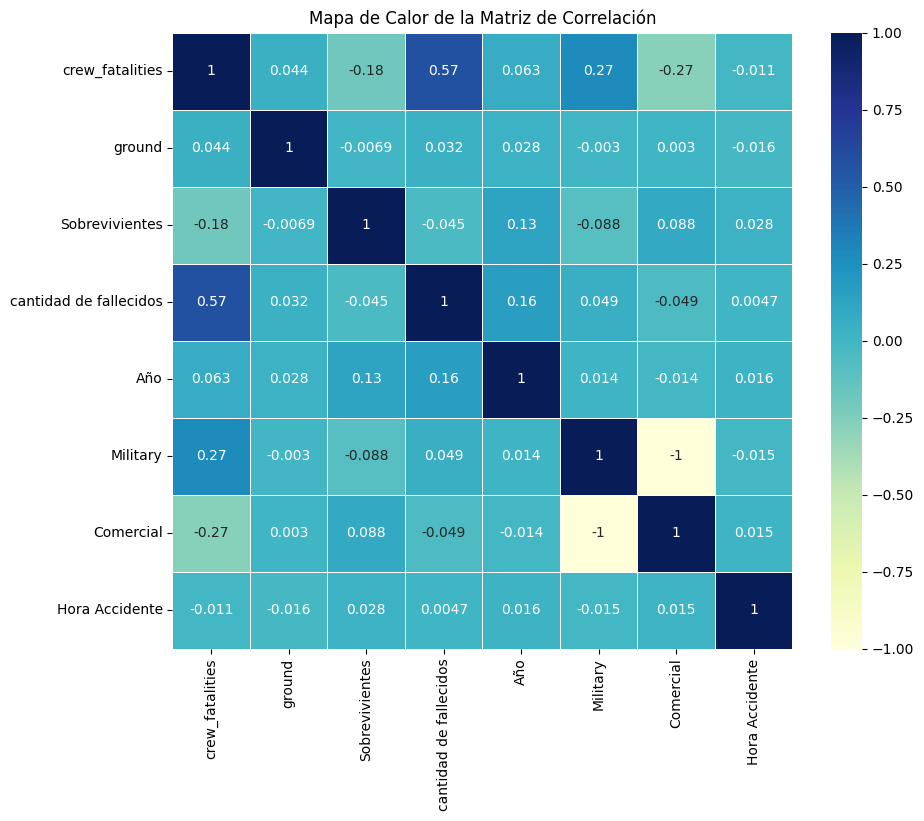

In [23]:
import seaborn as sns
# Establecemos el esquema de colores
cmap = 'YlGnBu'

# Creamos un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap=cmap, linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

_La matriz de correlación muestra la relación entre las diferentes variables en nuestro conjunto de datos._
- _Correlación Negativa entre Tripulantes Fallecidos y Vuelos Comerciales (-0.274762): Hay una correlación negativa entre la cantidad de tripulantes fallecidos y la categoría de vuelos comerciales. Esto podría indicar que los accidentes con tripulantes fallecidos tienden a estar menos relacionados con vuelos comerciales y podrían estar más asociados con operaciones militares u otros tipos de vuelos._
- _Correlación Perfectamente Negativa entre Categorías Militares y Comerciales (-1.0): La matriz muestra una correlación perfectamente negativa entre las categorías de vuelos militares y comerciales, lo que significa que las observaciones se dividen claramente en dos categorías mutuamente excluyentes. Esto es importante para distinguir entre vuelos militares y comerciales en el análisis._
- _Hora del Accidente con Correlación Muy Débil (0.015154): La hora del accidente tiene una correlación muy débil con las categorías de vuelos militares y comerciales. Esto indica que la hora del accidente no está fuertemente relacionada con el tipo de operación y, por lo tanto, es menos relevante en ese contexto._

***Distribución de accidentes por año***

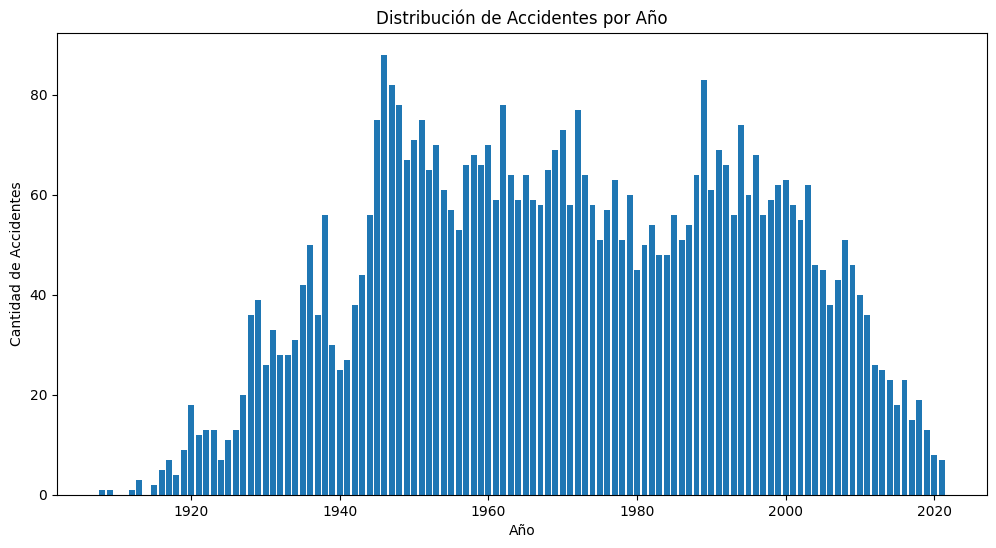

In [9]:
# Calculamos la cantidad de accidentes por año
accidents_by_year = df['Año'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(accidents_by_year.index, accidents_by_year.values)
plt.title('Distribución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()

_Nota: Se puede observar que la cantidad de accidentes alcanzan una frecuencia mayor en la década de 1940-1950, periodo que coincide con la 2da guerra mundial, asimismo, esta frecuencia se mantiene casi constante lo cual coincidiría con el periodo de la guerra fría._

***Distribución de accidentes por mes***

C:\Users\gmg\AppData\Local\Temp\ipykernel_17712\1806957843.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


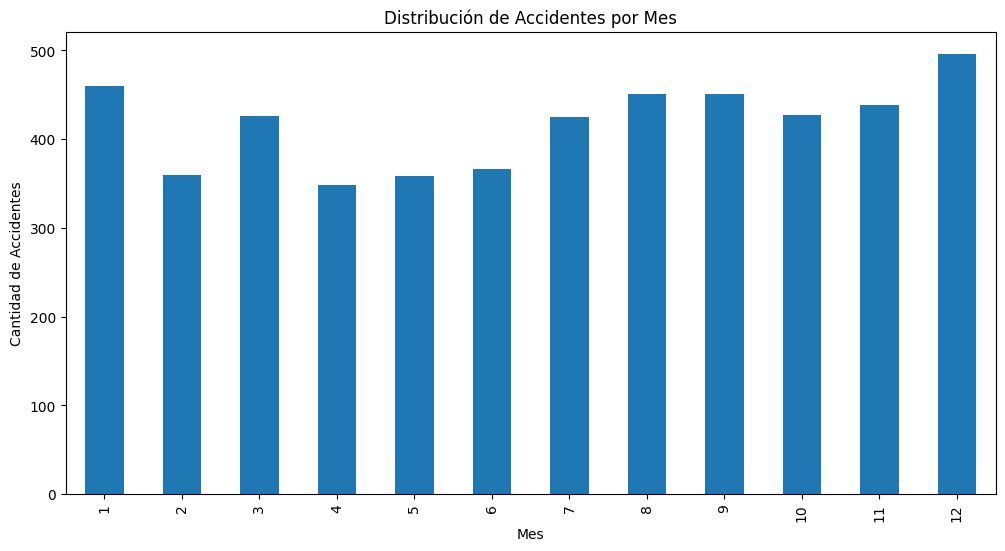

In [24]:
# Calculamos la cantidad de accidentes por mes
accidents_by_month = df.groupby(df['fecha'].dt.month)['fecha'].count()

# Creamos un gráfico de barras
ax = accidents_by_month.plot(kind='bar', figsize=(12, 6), title='Distribución de Accidentes por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Accidentes')

# gráfico
ax.figure.show()

***Distribución de accidentes por día de la semana***

C:\Users\gmg\AppData\Local\Temp\ipykernel_17712\4052977260.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


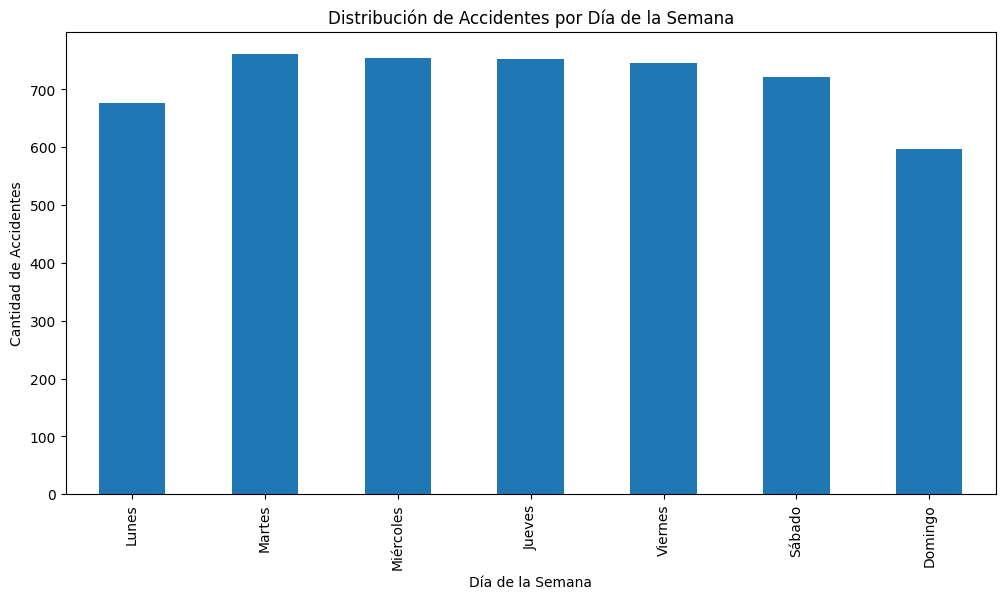

In [23]:
# Calculamos la cantidad de accidentes por día de la semana (0 = Lunes, 6 = Domingo)
accidents_by_weekday = df.groupby(df['fecha'].dt.weekday)['fecha'].count()

# Renombramos los días de la semana
accidents_by_weekday.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Creamos un gráfico de barras
ax = accidents_by_weekday.plot(kind='bar', figsize=(12, 6), title='Distribución de Accidentes por Día de la Semana')
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Cantidad de Accidentes')
ax.figure.show()

***Distribución de accidentes por Hora***

C:\Users\gmg\AppData\Local\Temp\ipykernel_17712\4211466906.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


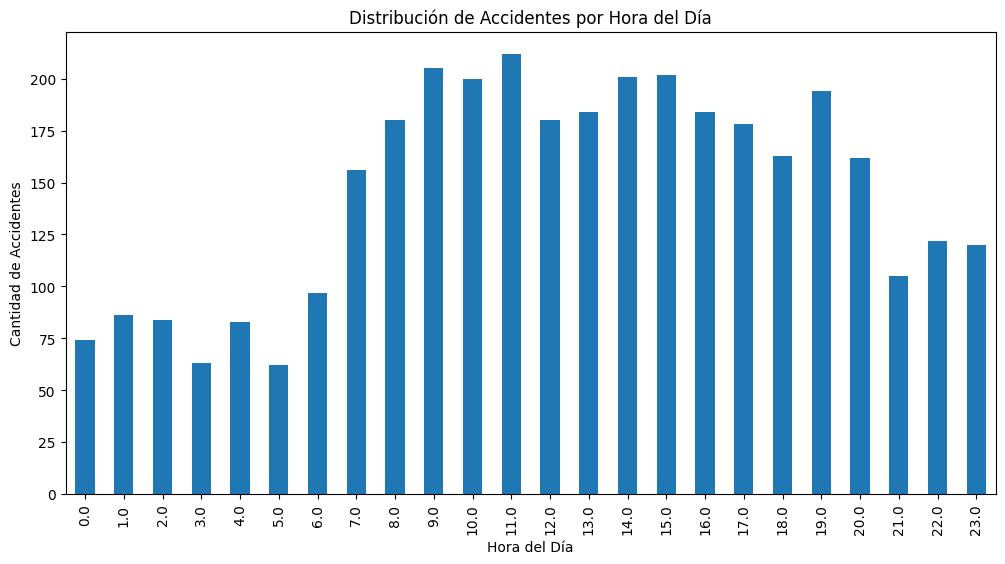

In [22]:
# Calculamos la cantidad de accidentes por hora del día
accidents_by_hour = df.groupby(df['Hora Accidente'].dt.hour)['Hora Accidente'].count()

# Creamos un gráfico de barras
ax = accidents_by_hour.plot(kind='bar', figsize=(12, 6), title='Distribución de Accidentes por Hora del Día')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Cantidad de Accidentes')
ax.figure.show()

*Comprobamos...*

In [18]:
# "Hora Accidente" esté en formato datetime
df['Hora Accidente'] = pd.to_datetime(df['Hora Accidente'], format='%H:%M:%S')

# Utilizamos la función groupby para agrupar por hora y contar la cantidad de accidentes en cada hora
accidents_by_hour = df.groupby(df['Hora Accidente'].dt.hour)['Hora Accidente'].count()

# la cantidad de accidentes por hora
print(accidents_by_hour)

Hora Accidente
0.0      74
1.0      86
2.0      84
3.0      63
4.0      83
5.0      62
6.0      97
7.0     156
8.0     180
9.0     205
10.0    200
11.0    212
12.0    180
13.0    184
14.0    201
15.0    202
16.0    184
17.0    178
18.0    163
19.0    194
20.0    162
21.0    105
22.0    122
23.0    120
Name: Hora Accidente, dtype: int64


***Visuzalización de los principales Operadores en los accidentes***

In [26]:
# "OperadOR" no tenga valores NaN
df['OperadOR'].fillna('Desconocido')

# Calculamos la frecuencia de operadores
operator_freq = df['OperadOR'].value_counts()
operator_freq = operator_freq.sort_values(ascending=False)

umbral = 10

# Agrupamos categorías 'OperadOR'
df['OperadOR'] = df['OperadOR'].apply(lambda x: 'Otros' if operator_freq.get(x, 0) < umbral else x)

N = 10  # Definimos el número de categorías a mostrar
top_N_operators = operator_freq.head(N)

<Axes: ylabel='OperadOR'>

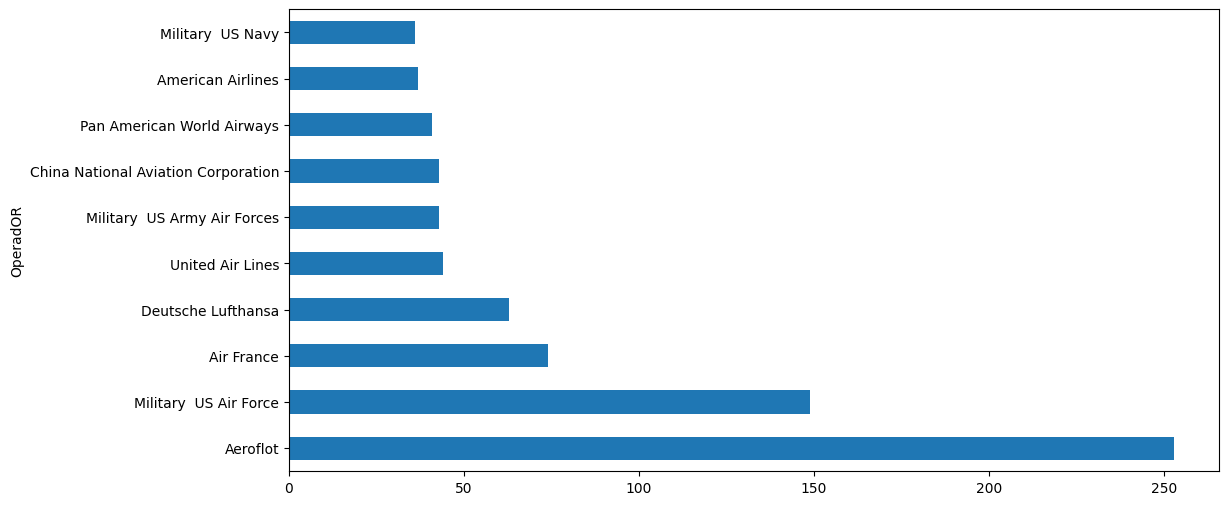

In [27]:
# Graficamos
top_N_operators.plot(kind='barh', figsize=(12, 6))

_Nota: En la gráfica se puede observa la moda de los principales operadores causantes de los accidentes durante 1908 a 2021._

***Proporción de accidentes Comerciales y Militares***

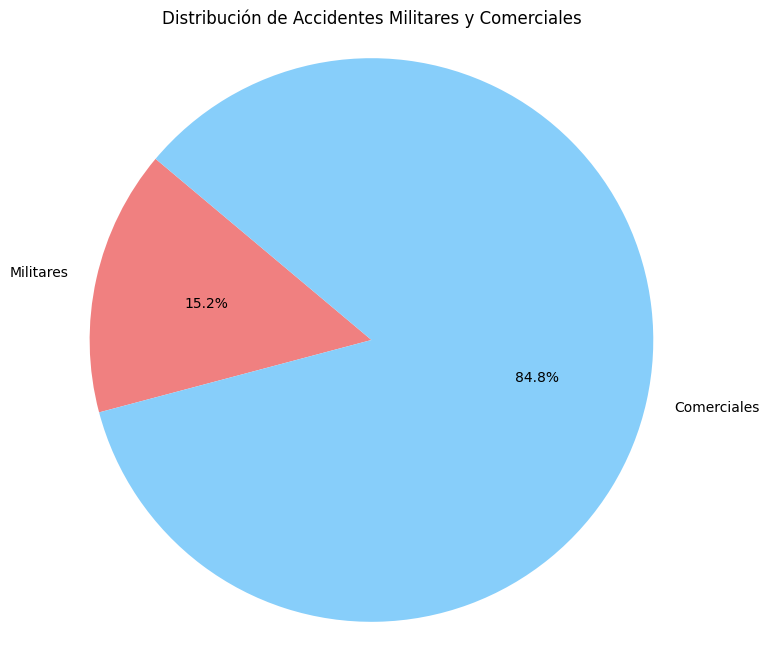

In [30]:
import matplotlib.pyplot as plt
# Filtramos los datos para obtener solo accidentes militares y comerciales
military_accidents = df[df['Military'] == 1]
commercial_accidents = df[df['Comercial'] == 1]

# Hallamos la cantidad de accidentes militares y comerciales
num_military_accidents = len(military_accidents)
num_commercial_accidents = len(commercial_accidents)

# Etiquetas para el gráfico de pastel
labels = ['Militares', 'Comerciales']

# Datos para el gráfico de pastel
sizes = [num_military_accidents, num_commercial_accidents]

# Colores para las secciones del gráfico
colors = ['lightcoral', 'lightskyblue']

# Creamos el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Accidentes Militares y Comerciales')
plt.axis('equal')  # Para que el gráfico de pastel sea circular

# Gráfico
plt.show()

_Nota: En el gráfico se observa la distribución de accidentes aéreos por su origen durante el período de 1908 a 2021. Los datos revelan que los accidentes de origen militar constituyen el 15.2% del total, mientras que los accidentes de origen comercial representan el 84.8%. Esto sugiere que la aviación comercial es un sector de alta actividad y que las aerolíneas comerciales enfrentan una mayor cantidad de incidentes en comparación con su contraparte militar; sin dejando de lado que la proporción de accidentes de origen militar fueron ocasionados por la guerra o entrenamientos militares (siendo el siglo XX una época muy belicosa). En conlusión, se ha visto como la industría de la aerolínea comercial ha avasallado a los accidentes de origen militar, por lo que se subraya la necesidad constante de mejorar la seguridad en la aviación comercial. Estos insights son esenciales para garantizar que la seguridad siga siendo una prioridad en la industria de la aviación._

***Principales rutas***

In [33]:
# Aseguramos que no haya valores NaN
df['Ruta'].fillna('Desconocido', inplace=True)  # Llena los valores NaN con 'Desconocido'
ruta_freq = df['Ruta'].value_counts()
umbral = 10

# Agrupación de categorías poco comunes en 'Ruta'
df['Ruta'] = df['Ruta'].apply(lambda x: 'Otros' if ruta_freq[x] < umbral else x)

ruta_freq = ruta_freq.sort_values(ascending=False)
N = 10 
top_N_ruta = ruta_freq.head(N)

<Axes: ylabel='Ruta'>

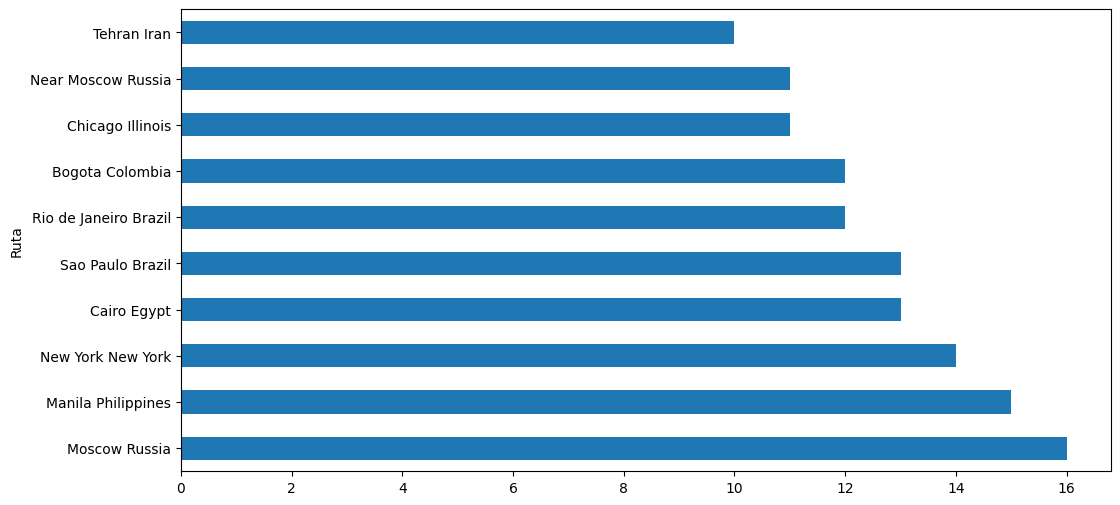

In [34]:
top_N_ruta.plot(kind='barh', figsize=(12, 6))

***Visualización de causales de accidentes***

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [38]:
# Summary como cadenas de texto
df['summary'] = df['summary'].fillna('').astype(str)

# Tokenización y eliminación de palabras vacías en 'summary', y eliminación de signos de puntuación
stop_words = set(stopwords.words('english'))
df['summary'] = df['summary'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.isalnum()]))

# Análisis de texto y conteo de palabras
all_words = [word for sublist in df['summary'].str.split() for word in sublist]
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)
common_words_df = pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia'])

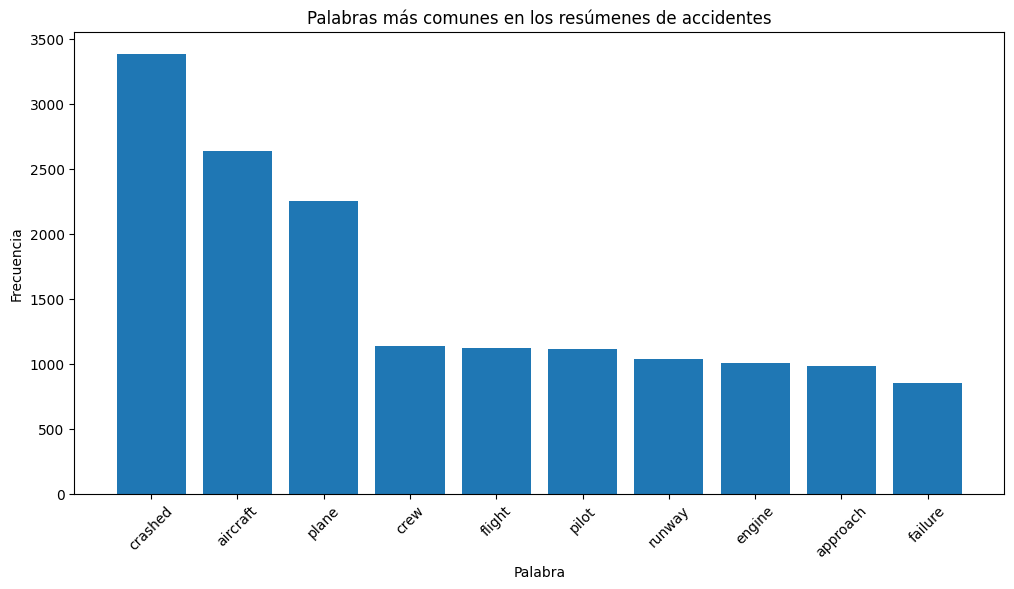

In [39]:
# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(common_words_df['Palabra'], common_words_df['Frecuencia'])
plt.title('Palabras más comunes en los resúmenes de accidentes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

_Nota: El gráfico proporciona pistas valiosas sobre las causas predominantes de los accidentes aéreos. Al analizar los términos más frecuentemente asociados con los accidentes, como "crashed," "aircraft," "plane," "crew," "flight," "pilot," "runway," "engine," "approach," y "failure," podemos extrapolar y comprender mejor las posibles causas subyacentes._

_Accidentes de Vuelo: La alta frecuencia de términos como "flight," "pilot," "aircraft," y "plane" sugiere que los problemas relacionados con la operación de aeronaves y la labor de los pilotos son causas frecuentes de accidentes._

_Fallas Técnicas: La presencia de "engine" y "failure" indica que problemas técnicos, posiblemente relacionados con fallas en los motores o sistemas de la aeronave, pueden contribuir a los accidentes._

_Factores Humanos: Los términos "crew" y "runway" sugieren que factores humanos, incluyendo errores de la tripulación y problemas en el despegue o aterrizaje, también pueden desempeñar un papel importante._

_Problemas en la Aproximación: La inclusión de "approach" señala que los problemas en la fase de aproximación al aterrizaje pueden ser una causa común de accidentes._

_Tipo de Aeronave: Los términos "aircraft" y "plane" sugieren que el tipo de aeronave utilizada puede influir en la probabilidad de accidentes._

***Visualización del KPI***

In [9]:
# KPI: crew_fatalities por decada
df = pd.read_csv('Acci.csv')
kpi_por_decada = df.groupby('Decada')['crew_fatalities'].sum().reset_index()
num_accidentes_por_decada = df.groupby('Decada').size().reset_index(name='NumAccidentes')
kpi_por_decada = kpi_por_decada.merge(num_accidentes_por_decada, on='Decada')
kpi_por_decada['Ratio_Crew_Fatalities'] = kpi_por_decada['crew_fatalities'] / kpi_por_decada['NumAccidentes']

In [14]:
kpi_por_decada

,Decada,crew_fatalities,NumAccidentes,Ratio_Crew_Fatalities
0,1901-1910,0.0,2,0.000000
1,1911-1920,70.0,49,1.428571
2,1921-1930,312.0,190,1.642105
3,1931-1940,795.0,359,2.214485
4,1941-1950,2126.0,626,3.396166
5,1951-1960,2484.0,651,3.815668
6,1961-1970,2624.0,648,4.049383
7,1971-1980,2331.0,584,3.991438
8,1981-1990,1888.0,569,3.318102
9,1991-2000,2143.0,633,3.385466


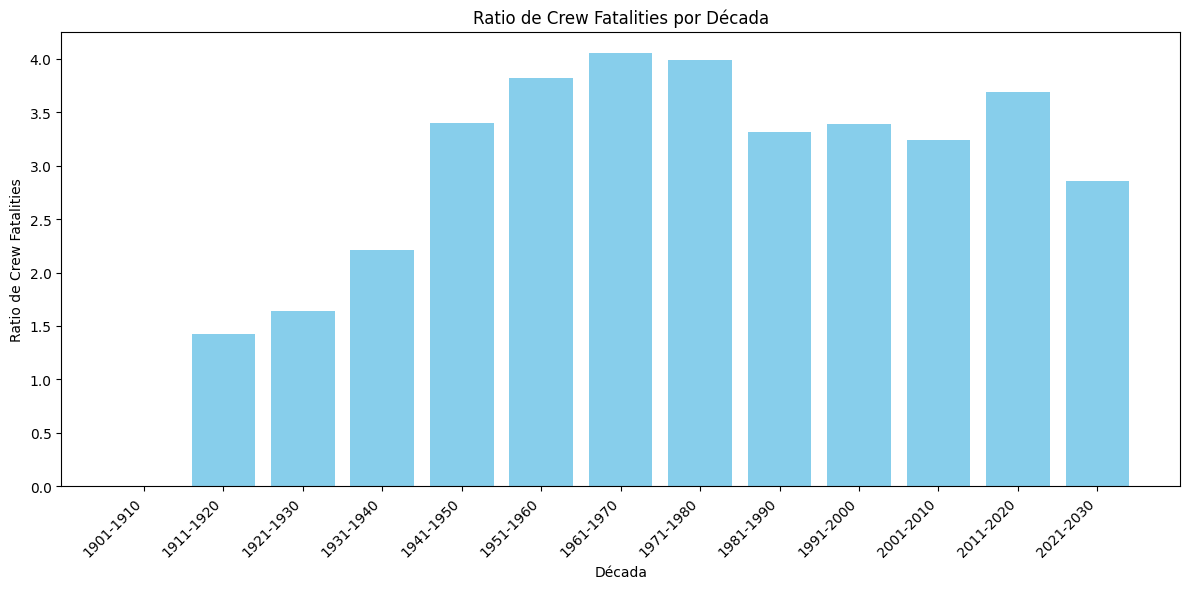

In [15]:
# Datos para graficar
decadas = kpi_por_decada['Decada']
ratio_crew_fatalities = kpi_por_decada['Ratio_Crew_Fatalities']

# Configuración de la gráfica
plt.figure(figsize=(12, 6))
plt.bar(decadas, ratio_crew_fatalities, color='skyblue')
plt.xlabel('Década')
plt.ylabel('Ratio de Crew Fatalities')
plt.title('Ratio de Crew Fatalities por Década')
plt.xticks(rotation=45, ha='right')

# gráfica
plt.tight_layout()
plt.show()

_Nota: El gráfico de barras ilustra la evolución del ratio de crew fatalities en accidentes aéreos a lo largo de diferentes décadas desde 1901 hasta la actualidad. Se observa un patrón interesante: el ratio comenzó en 0 durante la década de 1901-1910, lo que podría indicar un inicio relativamente seguro de la aviación. Sin embargo, a medida que avanzamos en el tiempo, el ratio aumentó constantemente hasta la década de 1980, alcanzando su punto máximo. A partir de entonces, se estabilizó, pero en un nivel significativamente superior al inicio. Este análisis subraya la importancia continua de mejorar la seguridad en la industria de la aviación, a pesar de los avances tecnológicos y las regulaciones de seguridad implementadas._

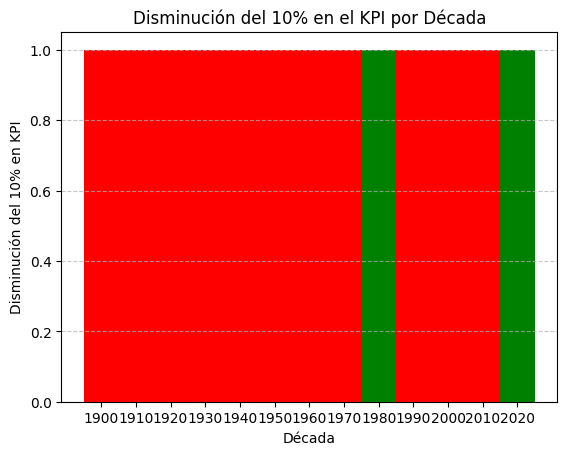

In [16]:
# Definimos los años de inicio de cada década
decadas = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Definimos si hubo o no disminución del 10% en el KPI por década (1 para sí, 0 para no)
disminucion_kpi = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

# Colores para las barras (rojo para no disminución, verde para disminución)
colores = ['red' if x == 0 else 'green' for x in disminucion_kpi]

# Creamos un gráfico de barras
plt.bar(decadas, [1] * len(decadas), color=colores, width=10)
plt.xlabel("Década")
plt.ylabel("Disminución del 10% en KPI")
plt.title("Disminución del 10% en el KPI por Década")

# Etiquetamos de las décadas
plt.xticks(decadas)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# gráfico
plt.show()

_Nota: El gráfico describe la comparación del kpi entre decadas contiguas, se observa que solo en los 80 y actualidad (2021) hubo una disminución del kpi. Respecto a la década de referencia no hubo una disminución del 10% en la decada 2011-2020, sino un incremento._

In [50]:
df

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,...,ground,summary,Año,Hora Accidente,Decada,Valor Decada,Military,Comercial,Sobrevivientes,Sobrevivientes_Pasajeros
0,0,1908-09-17,1718,Otros,Military US Army,NaN,Demonstration,Wright Flyer III,NaN,1,...,0.0,demonstration flight army flyer flown orville ...,1908,1900-01-01 17:18:00,1901-1910,1,1.0,0.0,1.0,0.0
1,1,1909-09-07,NaN,Otros,Otros,NaN,Air show,Wright Byplane,SC1,NaN,...,0.0,eugene lefebvre first pilot ever killed air ac...,1909,NaT,1901-1910,1,NaN,NaN,0.0,1.0
2,2,1912-07-12,0630,Otros,Military US Navy,NaN,Test flight,Dirigible,NaN,NaN,...,0.0,first dirigible akron exploded offshore altitu...,1912,1900-01-01 06:30:00,1911-1920,2,1.0,0.0,0.0,5.0
3,3,1913-08-06,NaN,Otros,Private,NaN,NaN,Curtiss seaplane,NaN,NaN,...,0.0,first fatal airplane accident canada occurred ...,1913,NaT,1911-1920,2,0.0,1.0,0.0,1.0
4,4,1913-09-09,1830,Otros,Military German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,...,0.0,airship flew thunderstorm encountered severe d...,1913,1900-01-01 18:30:00,1911-1920,2,1.0,0.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,2021-03-28,1835,Otros,Otros,NaN,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,...,0.0,sightseeing helicopter crashed missing top ft ...,2021,1900-01-01 18:35:00,2021-2030,13,0.0,1.0,1.0,1.0
5004,5004,2021-05-21,1800,Otros,Otros,NaN,NaN,Beechcraft B300 King Air 350i,NAF203,FL-891,...,0.0,final approach poor weather conditions aircraf...,2021,1900-01-01 18:00:00,2021-2030,13,1.0,0.0,0.0,4.0
5005,5005,2021-06-10,0800,Otros,Otros,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,...,0.0,plane carrying military personnel monks crashe...,2021,1900-01-01 08:00:00,2021-2030,13,1.0,0.0,2.0,1.0
5006,5006,2021-07-04,11:30,Otros,Otros,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,...,3.0,attempting land jolo airport military transpor...,2021,1900-01-01 11:30:00,2021-2030,13,1.0,0.0,46.0,NaN


### ***Importación a MySQL***

In [ ]:
%pip install sqlalchemy

In [ ]:
%pip install mysql-connector-python

In [54]:
from sqlalchemy import create_engine

In [57]:
# Reemplazamos estos valores con tus credenciales y detalles de la base de datos MySQL
usuario = 'root'
contraseña = 'Polvodediamante1.'
host = 'localhost'  
puerto = 3306
nombre_base_de_datos = 'Proyecto2'

# Creamos una conexión a la base de datos MySQL
engine = create_engine(f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_de_datos}")

# Insertamos los datos del DataFrame en la tabla de la base de datos
df.to_sql('accidentes', engine, if_exists='replace', index=False)

print("Datos insertados en la base de datos MySQL.")


Datos insertados en la base de datos MySQL.


![Imagen](CAPTURAMYSQL.png)